#In this project We are going to analyze the Airbnb New York dataset
# New York City Airbnb Open Data
#Airbnb is a paid community platform for renting and booking private accommodation founded in 2008. Airbnb allows individuals to rent all or part of their own home as extra accommodation.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
filead=files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [ ]:
#df = pd.read_csv('/content/drive/My Drive/dataset/AB_NYC_2019.csv')
df = pd.read_csv("AB_NYC_2019.csv")
df_copy = df.copy()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#The dataset contains the following variables:


1.   id (int): identification number
2.   name (string): name of the apartment
3.   host_id (int): identification number of the host
4.   neighbourhood_group (String): neighbourhood group. Four groups (Bronx,Queens,Manhattan,Staten Island,Brooklyn)
5.   latitude (Float): Latitude of the apartment
6.   longitude (Float): Longitude of the apartment
7.   room_type (String): Type of room
8.   price (int): Price per night
9.   minimum_nights (int): Minimum nights to stay in the apartment
10.  number_of_reviews (String): Number of reviews of the apartment
11.  availability_365 (int): Number of available days of this apartment during the year.







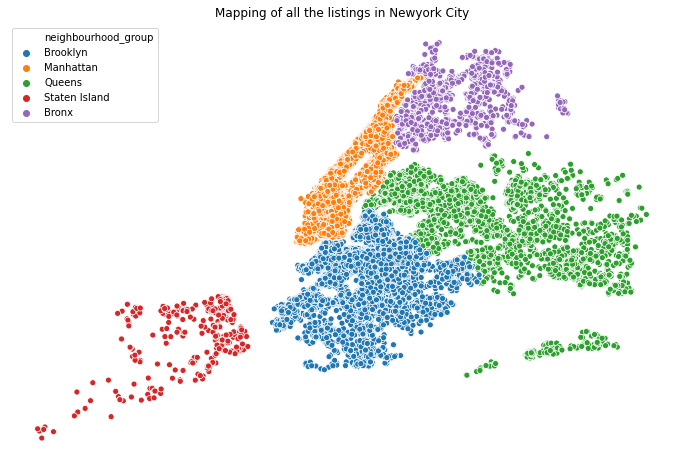

In [ ]:
plt.figure(figsize=(12, 8))
g=sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
# g.legend_.remove()
plt.box(False)
plt.axis('off');
plt.title('Mapping of all the listings in Newyork City');

<center><image src='https://upload.wikimedia.org/wikipedia/commons/3/34/5_Boroughs_Labels_New_York_City_Map.svg' width=600 height=600></center>


# EDA

### Number of Rows & Number of Columns

In [ ]:
print(f'The Dataset contains {df.shape[0]} rows & {df.shape[1]} columns')

The Dataset contains 48895 rows & 16 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Numerical Data Columns

In [ ]:
print(df.select_dtypes(exclude='O').columns)

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


### Categorical Data Columns

In [ ]:
print(df.select_dtypes(include='O').columns)

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')


**Some of the columns are not required for Regression Analysis, so we will drop those columns**

In [ ]:
df = df.drop(['last_review', 'host_name', 'name', 'id', 'host_id'], axis=1)

### Checking For Null values

In [ ]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Replacing all the values in the reviews_per_month column to 0

df['reviews_per_month'].fillna(0, inplace = True)

In [ ]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**There are no null values present in the Database**

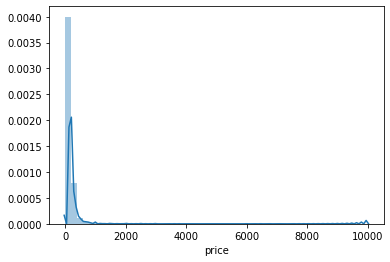

In [ ]:
sns.distplot(a=df['price']);

**We can see that the Distribution for House Prices is heavily skewed to the right, with House prices upto 10000$**

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
Q3+IQR*1.5

334.0

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


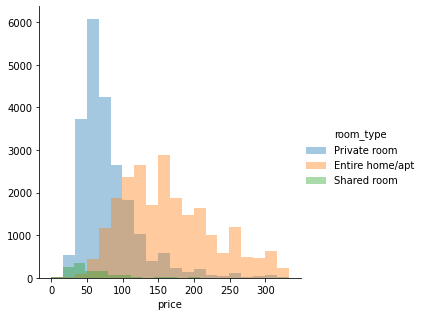

In [ ]:
temp_df = df[df['price'] < (Q3+IQR*1.5)]
sns.FacetGrid(temp_df, hue='room_type', size=4.5).map(sns.distplot, 'price', kde=False, bins=20).add_legend();

In [ ]:
print(f"The Mean of House prices is {round(df['price'].mean())}$")
print(f"The Median of House prices is {round(df['price'].median())}$")

The Mean of House prices is 153$
The Median of House prices is 106$


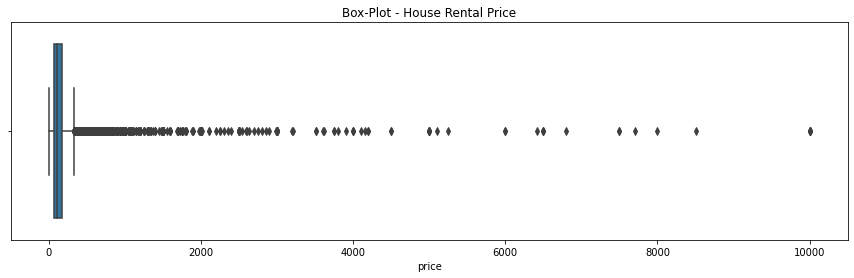

In [ ]:
plt.figure(figsize=(15, 4))

sns.boxplot(x=df['price'])

plt.title('Box-Plot - House Rental Price');

In [ ]:
df[df['price'] > (Q3+IQR*1.5)].shape[0]

2972

**There are 12177 houses above the Upper Extreme of Box Plot**

**According to the Box-Plot; listings above price of $334 should be considered as outliers**



**There are some Houses, listed with price of 0$, we will drop those columns as it is unlikely that people are letting others to rent their houses for Free**

In [ ]:
df = df[df['price'] != 0]

### Most Common Renting Price for the Houses

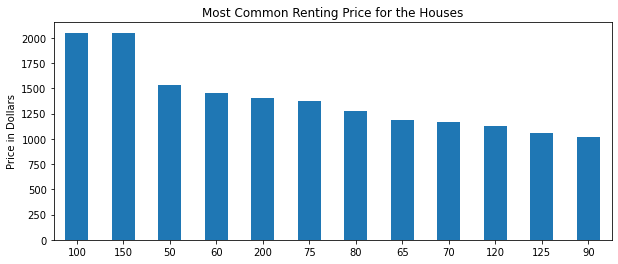

In [ ]:
plt.figure(figsize=(10, 4))

df['price'].value_counts().nlargest(12).plot(kind='bar')

plt.xticks(rotation=0);
plt.title('Most Common Renting Price for the Houses');
plt.ylabel('Price in Dollars');

### Average Price for Different room Types

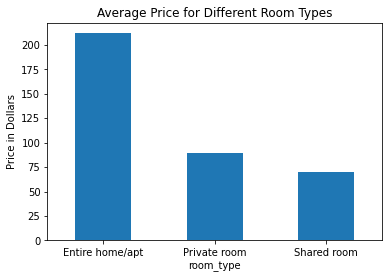

In [ ]:
plt.figure(figsize=(6, 4))

df.groupby('room_type')['price'].mean().plot(kind='bar')

plt.xticks(rotation=0);
plt.ylabel('Price in Dollars');
plt.title('Average Price for Different Room Types');

**We can see that the Entire Apartments cost high on Average than Private Rooms or Shared Rooms**

### Most Commom Room Types Preferred for Renting

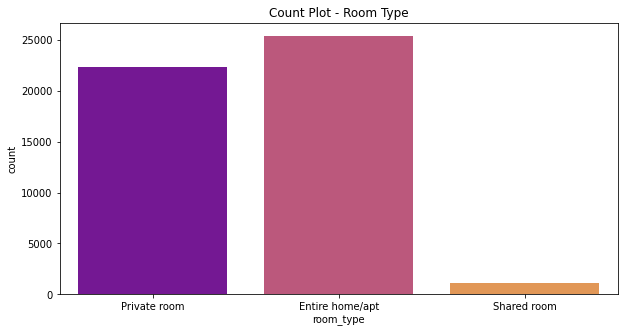

In [ ]:


sns.countplot(df['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Count Plot - Room Type');

**We can see that there are more listings for Entire Homes or Private Rooms**

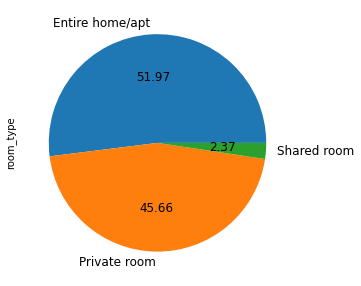

In [ ]:
df['room_type'].value_counts().plot(kind='pie', autopct='%.2f',fontsize=12,figsize=(5,5))

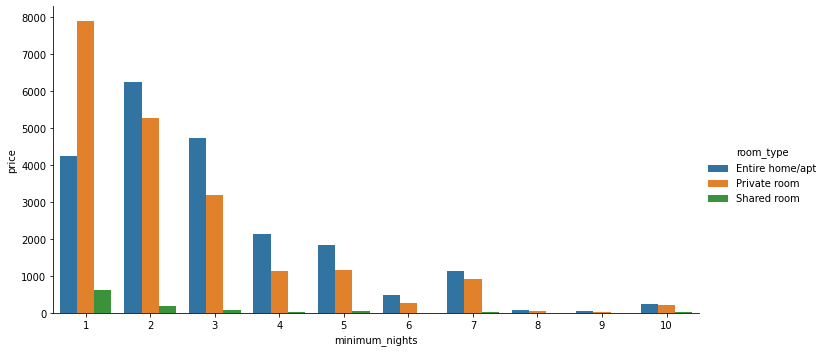

In [ ]:
temp_df = pd.DataFrame(df.groupby(['minimum_nights', 'room_type'])['price'].count()[:30])
temp_df.reset_index(inplace=True)


sns.catplot(x='minimum_nights', y='price', hue='room_type', data=temp_df, kind='bar', aspect=2);

**Observations**

- We can see that Private rooms have more 1 minimun night requirements than, Entire Apartments
- People who rent their Entire apartments prefer having minimum 2 or 3 night stay
- Entire Apartments have more 2 or 3 nights requirements than Private rooms

### Minimum nights Requirements

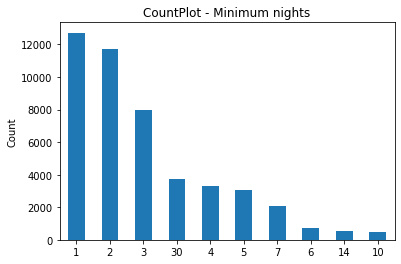

In [ ]:
df['minimum_nights'].value_counts()[:10].plot(kind='bar')

plt.xticks(rotation=0);
plt.ylabel('Count');
plt.title('CountPlot - Minimum nights');

**Most minimum night requirements listed are 1, 2 or 3 nights**

### Cities with Most Listings

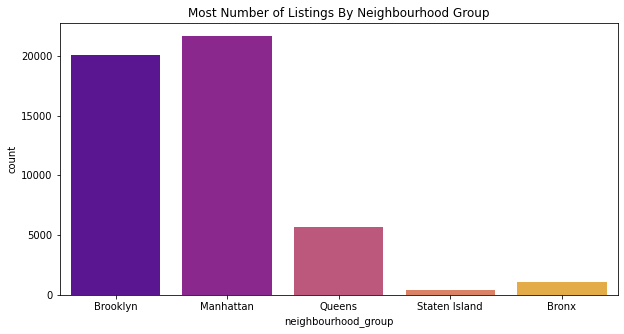

In [ ]:
sns.countplot(df['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Most Number of Listings By Neighbourhood Group');

**Manhattan has the most listings for renal homes followed by Brooklyn**

# Most costly Cities to Rent Rooms

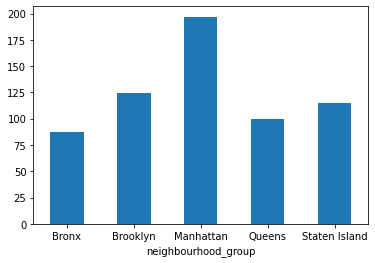

In [ ]:
df.groupby('neighbourhood_group').mean()['price'].plot(kind='bar')

plt.xticks(rotation=0);

**Manhattan is an important commercial, financial, and cultural center of Newyork, so it makes sense that average cost of renting rooms is high in Manhattan than other areas**

In [ ]:
# Neighbourhood with most number of listings and their median renting cost 

In [ ]:
df[df['neighbourhood_group'] == 'Manhattan'].groupby('neighbourhood').agg(['median', 'count'])['price'].nlargest(10, columns='count').style.background_gradient(cmap='Reds')


,median,count
neighbourhood,,
Harlem,89.000000,2658
Upper West Side,150.000000,1971
Hell's Kitchen,168.000000,1958
East Village,150.000000,1853
Upper East Side,149.000000,1798
Midtown,210.000000,1545
East Harlem,99.000000,1117
Chelsea,199.000000,1113
Lower East Side,139.000000,911


In [ ]:
df[df['neighbourhood_group'] == 'Brooklyn'].groupby('neighbourhood').agg(['median', 'count'])['price'].nlargest(10, columns='count').style.background_gradient(cmap='Reds')

,median,count
neighbourhood,,
Williamsburg,105.000000,3919
Bedford-Stuyvesant,80.000000,3710
Bushwick,65.000000,2462
Crown Heights,85.000000,1564
Greenpoint,119.000000,1114
Flatbush,72.000000,621
Clinton Hill,120.000000,572
Prospect-Lefferts Gardens,80.000000,535
Park Slope,145.000000,506


In [ ]:
df[df['neighbourhood_group'] == 'Queens'].groupby('neighbourhood').agg(['median', 'count'])['price'].nlargest(10, columns='count').style.background_gradient(cmap='Reds')

,median,count
neighbourhood,,
Astoria,85.000000,900
Long Island City,99.000000,537
Flushing,65.000000,426
Ridgewood,60.000000,423
Sunnyside,75.000000,363
Ditmars Steinway,79.000000,309
Elmhurst,59.000000,237
Woodside,60.000000,235
Jamaica,70.000000,231


In [ ]:
df[df['neighbourhood_group'] == 'Bronx'].groupby('neighbourhood').agg(['median', 'count'])['price'].nlargest(10, columns='count').style.background_gradient(cmap='Reds')

,median,count
neighbourhood,,
Kingsbridge,70.000000,70
Fordham,60.000000,63
Longwood,75.000000,62
Mott Haven,74.000000,60
Concourse,81.000000,50
Wakefield,60.000000,50
Port Morris,62.500000,46
Allerton,66.500000,42
Williamsbridge,64.000000,40


In [ ]:
df[df['neighbourhood_group'] == 'Staten Island'].groupby('neighbourhood').agg(['median', 'count'])['price'].nlargest(10, columns='count').style.background_gradient(cmap='Reds')

,median,count
neighbourhood,,
St. George,96.000000,48
Tompkinsville,62.500000,42
Stapleton,75.000000,27
Concord,34.500000,26
Arrochar,65.000000,21
Randall Manor,79.000000,19
West Brighton,69.500000,18
Clifton,75.000000,15
Great Kills,83.000000,10


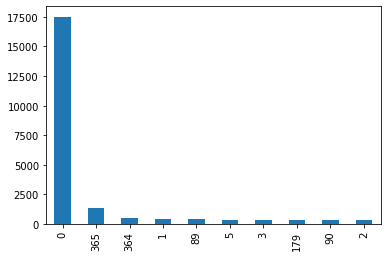

In [ ]:
df['availability_365'].value_counts()[:10].plot(kind='bar');

**Observations**

- We can see that many of the listings have an availability set as 0
- This is due to AIRBNB allows hosts to temporarily set their listing as UNAVAILABLE, and not remove the listing
- This results in listings that are temporarily unavailable due to host preferences

In [ ]:
df = df[df['price'] < (Q3+IQR*1.5)]

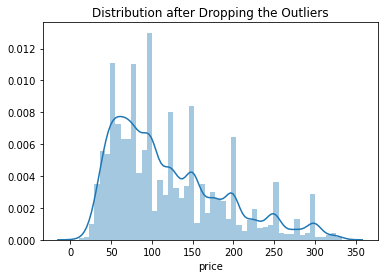

In [ ]:
sns.distplot(a=df['price']);
plt.title('Distribution after Dropping the Outliers');

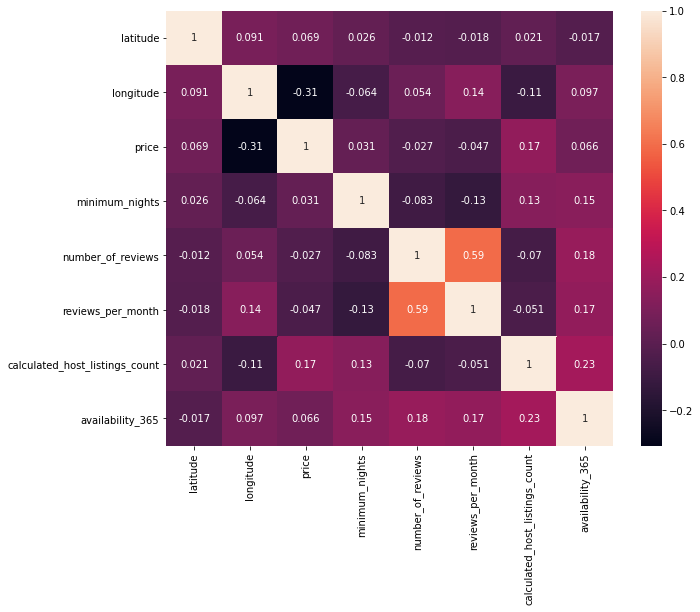

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True);

**Observations**
- **There are no features with a strong correlation with the Target Variables**
- **Also there is no MultiCollinearity present between the Features**

In [ ]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64","float64"])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
df_cat.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,neighbourhood_group,neighbourhood,room_type
0,1,107,1
1,2,126,0
2,2,93,1
3,1,41,0
4,2,61,0


In [ ]:
df_new = pd.concat([df_num, df_cat], axis=1)
df_new.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,107,1
1,40.75362,-73.98377,225,1,45,0.38,2,355,2,126,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,2,93,1
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,41,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,2,61,0


In [ ]:
df_mm = df_new.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
columns = df_mm.columns.to_list()
columns.remove('price')

for col in columns:
    mm = MinMaxScaler()
    df_mm[col] = mm.fit_transform(df_mm[[col]])
df_mm.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,0.357393,0.511921,149,0.000000,0.014308,0.003590,0.015337,1.000000,0.25,0.490826,0.5
1,0.614199,0.490469,225,0.000000,0.071542,0.006496,0.003067,0.972603,0.50,0.577982,0.0
2,0.748252,0.569257,150,0.001601,0.000000,0.000000,0.000000,1.000000,0.50,0.426606,0.5
3,0.448496,0.535649,89,0.000000,0.429253,0.079316,0.000000,0.531507,0.25,0.188073,0.0
4,0.722820,0.565324,80,0.007206,0.014308,0.001709,0.000000,0.000000,0.50,0.279817,0.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
X = df_mm.drop("price",axis=1)
y = np.log(df_mm['price'])

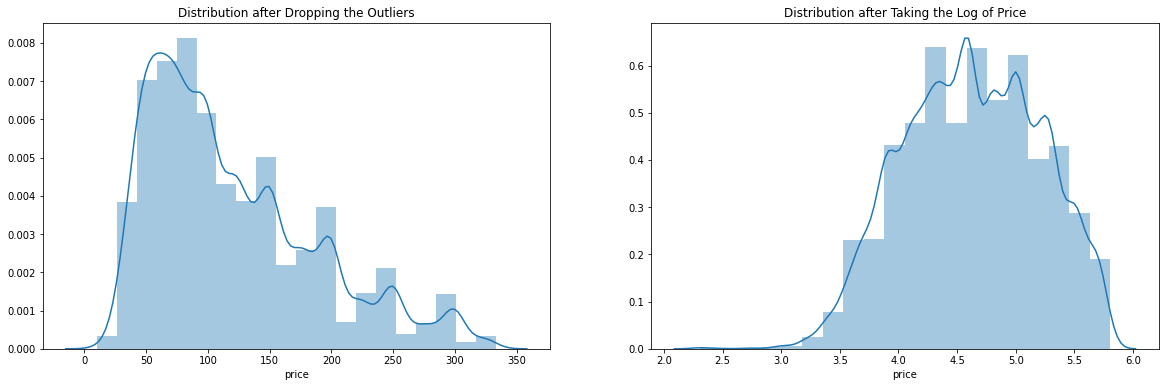

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

ax=ax.flatten()

sns.distplot(a=df['price'], ax=ax[0], bins=20);
ax[0].set(title='Distribution after Dropping the Outliers');

sns.distplot(a=y, ax=ax[1], bins=20);
ax[1].set(title='Distribution after Taking the Log of Price');

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=353)

In [ ]:
#Prepare a Linear Regression Model
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.5106085039232615

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regrRM = RandomForestRegressor(n_estimators=100)
regrRM.fit(X_train, y_train)
print(regrRM.score(X_test,y_test))

0.6310173441414317


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.406222


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [ ]:
regrRM = RandomForestRegressor(n_estimators=500, max_depth = 15)
regrRM.fit(X_train, y_train)
y_pred = regrRM.predict(X_test)
print(regrRM.score(X_test,y_test))

0.6400103942797585


In [ ]:
regrRM.estimators_

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=431911764, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1296746075, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_dec

In [ ]:
len(regrRM.estimators_)

500

[Text(558.0, 713.475, 'X[9] <= 0.25\nmse = 0.334\nsamples = 20242\nvalue = 4.624'),
 Text(279.0, 509.625, 'X[1] <= 0.53\nmse = 0.168\nsamples = 9948\nvalue = 5.01'),
 Text(139.5, 305.775, 'X[0] <= 0.371\nmse = 0.131\nsamples = 4926\nvalue = 5.148'),
 Text(69.75, 101.92499999999995, '\n  (...)  \n'),
 Text(209.25, 101.92499999999995, '\n  (...)  \n'),
 Text(418.5, 305.775, 'X[1] <= 0.572\nmse = 0.167\nsamples = 5022\nvalue = 4.876'),
 Text(348.75, 101.92499999999995, '\n  (...)  \n'),
 Text(488.25, 101.92499999999995, '\n  (...)  \n'),
 Text(837.0, 509.625, 'X[1] <= 0.525\nmse = 0.212\nsamples = 10294\nvalue = 4.25'),
 Text(697.5, 305.775, 'X[0] <= 0.414\nmse = 0.229\nsamples = 2800\nvalue = 4.512'),
 Text(627.75, 101.92499999999995, '\n  (...)  \n'),
 Text(767.25, 101.92499999999995, '\n  (...)  \n'),
 Text(976.5, 305.775, 'X[1] <= 0.577\nmse = 0.171\nsamples = 7494\nvalue = 4.153'),
 Text(906.75, 101.92499999999995, '\n  (...)  \n'),
 Text(1046.25, 101.92499999999995, '\n  (...)  \n')

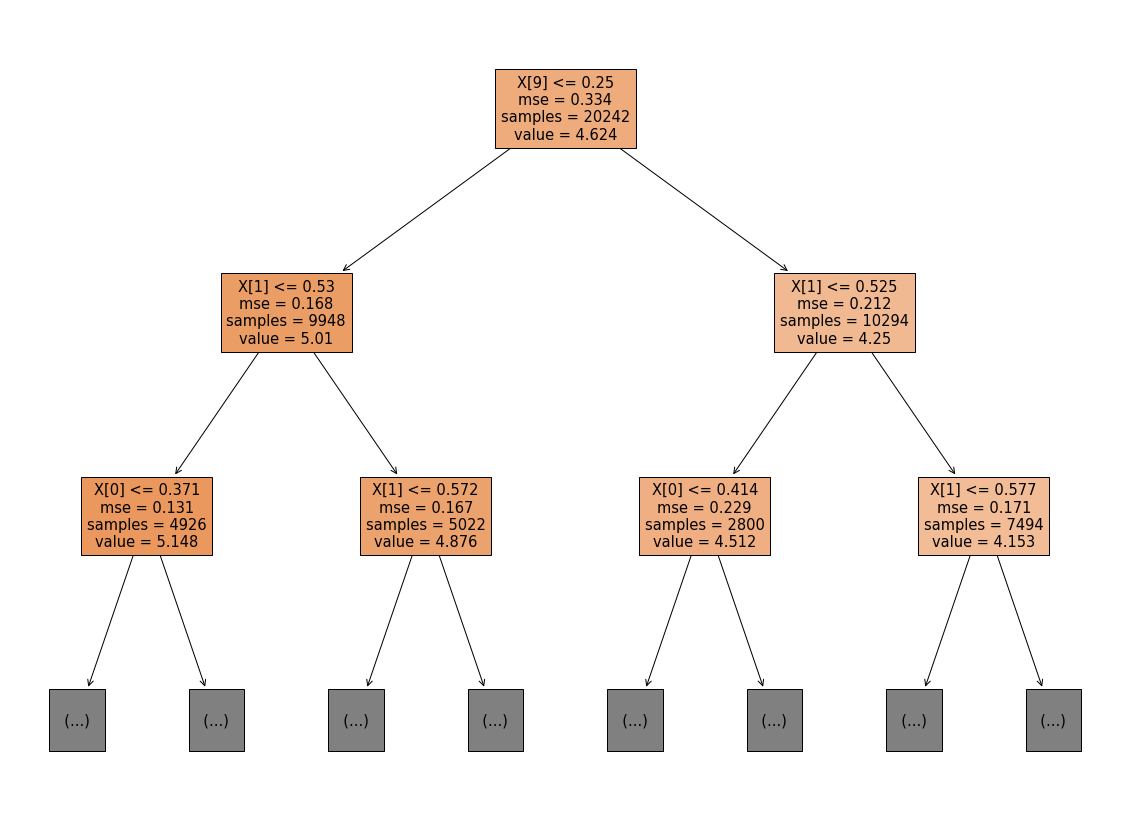

In [ ]:
plt.figure(figsize=(20,15))
tree.plot_tree(regrRM.estimators_[2],max_depth=2,filled=True,)
## here we set max_depth ==3

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.348402


In [ ]:
import xgboost as xgb

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
              max_depth = 10, alpha = 2, n_estimators = 500,)

In [ ]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=2, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
xg_reg.score(X_test, y_test)

0.6348630366268098

In [ ]:
preds = xg_reg.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.350884


In [ ]:
r2_score(y_test, preds)

0.6348630366268098

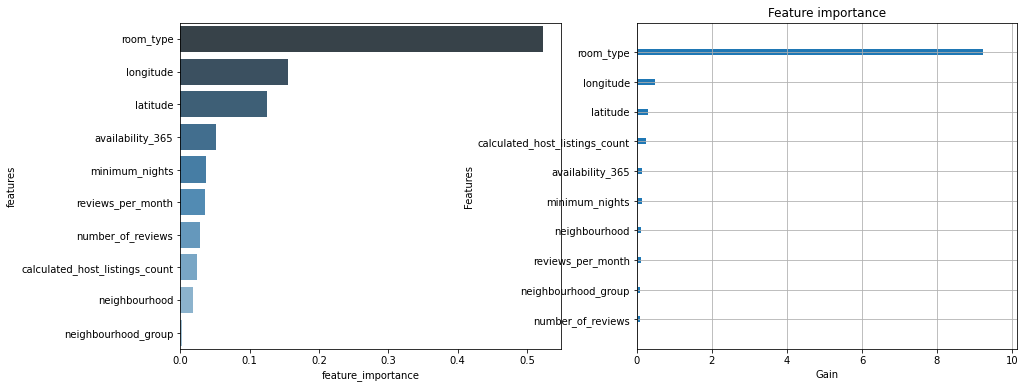

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax = ax.flatten()

temp_df = (pd.DataFrame({"features": X.columns,
                    "feature_importance": regrRM.feature_importances_})
      .sort_values("feature_importance", ascending=False)
      .reset_index(drop=True))

sns.barplot(x="feature_importance",
            y="features",
            data=temp_df,
            orient="h", palette="Blues_d", ax=ax[0])

xgb.plot_importance(xg_reg, importance_type='gain', xlabel='Gain',show_values=False, ax=ax[1])

In [ ]:
score_dict = {'Linear Regression': [reg.score(X_test,y_test)],
              'Random Forest Regression ': [regrRM.score(X_test,y_test)],
              'XGBoost':[xg_reg.score(X_test, y_test)] }

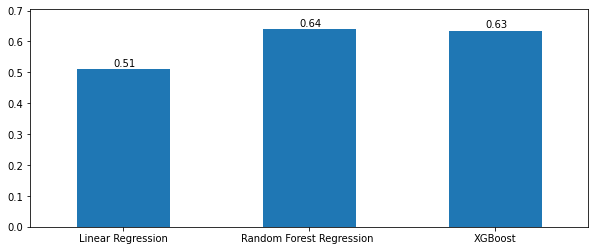

In [ ]:
temp_df = pd.DataFrame.from_dict(score_dict, orient='index').reset_index()
temp_df.columns = ['Model', 'R2-Score']

plot = temp_df['R2-Score'].plot(kind='bar', figsize=(10,4))

plt.xticks([0,1,2], (temp_df['Model']), rotation=0);

plt.margins(x=0.2, y=0.1, tight=True)

for rect in plot.patches:
    height = rect.get_height()
    width = rect.get_width()
    
    x_ = rect.get_x()
    y_ = rect.get_y()
    
    label_text = f'{round(height, 2)}'
    
    label_x = x_ + width - 0.3
    label_y = y_ + height + 0.01
    
    plt.text(label_x, label_y, label_text)

In [ ]:
X = X.drop(['number_of_reviews', 'neighbourhood_group', 'reviews_per_month'], axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=353)

In [ ]:
regrRM2 = RandomForestRegressor(n_estimators=500, max_depth = 15)
regrRM2.fit(X_train, y_train)
print(regrRM2.score(X_test, y_test))

0.6333797877611551


**Observatiions**
- **After dropping additional Features we can see thst the score is not affected by much**
- **So we can drop these features if we want to reduce the Model Complexity**

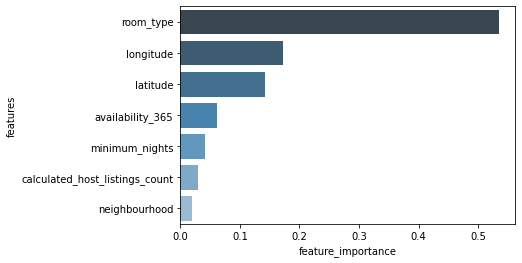

In [ ]:
temp_df = (pd.DataFrame({"features": X.columns,
                    "feature_importance": regrRM2.feature_importances_})
      .sort_values("feature_importance", ascending=False)
      .reset_index(drop=True))

sns.barplot(x="feature_importance",
            y="features",
            data=temp_df,
            orient="h", palette="Blues_d");

# Conclusions

- **We get a R2 Score of approximately 0.64 using the Random Forest Regressor and XGBoost**

- **The most important features used to determine the listing prices are**

 1. Room Type
 2. Longitude
 3. Latitde

- **We can also reduce the model complexity by further dropping some columns**